In [ ]:
import matplotlib.pyplot as plt
import time
import datetime
import numpy as np
import pandas as pd
import os, sys
import pymysql

plt.rc('font', family='HYsanB')

In [ ]:
def savePoleId():
    conn = pymysql.connect(host='localhost', user='root', password='1111', db='kepco', charset='utf8')
    curs = conn.cursor(pymysql.cursors.DictCursor)  # DictCursor: row 결과를 dictionary 형태로 반환
    query_select = """select pole_id from
                    (select pole_id from tb_iot_pole
                    union select pole_id from tb_iot_pole_201604
                    union select pole_id from tb_iot_pole_201605
                    union select pole_id from tb_iot_pole_201606
                    union select pole_id from tb_iot_pole_201607
                    union select pole_id from tb_iot_pole_201608
                    union select pole_id from tb_iot_pole_201609
                    union select pole_id from tb_iot_pole_201610
                    union select pole_id from tb_iot_pole_201611
                    union select pole_id from tb_iot_pole_201612 )a
                    where pole_id !='' and pole_id not like '%Test%'
                    order by pole_id"""
    curs.execute(query_select)
    result = curs.fetchall() # fetchall: data를 한번에 가져옴, fetchone: 하나의 row만 가져옴, fetchmany(n): n개만큼의 데이타를 가져옴
    data = pd.DataFrame(result)
    os.chdir("D:\\dev\\IoT_data")
    data.to_csv('all_pole_id.csv', encoding='utf-8')

In [ ]:
def savePoleData(pole_id):
    conn = pymysql.connect(host='localhost', user='root', password='1111', db='kepco', charset='utf8')
    curs = conn.cursor(pymysql.cursors.DictCursor)
    query_select =  """select pole_id, time_id, sensor_id, ri, pi, temp, humi, pitch, roll, ambient, uv, press, battery, period, current, shock, geomag_x, geomag_y, geomag_z, var_x, var_y, var_z, usn, ntc, uvc, part_name from(
                    select pole_id, time_id, sensor_id, ri, pi, temp, humi, pitch, roll, ambient, uv, press, battery, period, current, shock, geomag_x, geomag_y, geomag_z, var_x, var_y, var_z, usn, ntc, uvc, NULL as part_name from tb_iot_pole
                    union all
                    select pole_id, time_id, sensor_id, ri, pi, temp, humi, pitch, roll, ambient, uv, press, battery, period, current, shock, geomag_x, geomag_y, geomag_z, var_x, var_y, var_z, usn, ntc, uvc, part_name from tb_iot_pole_201604
                    union all
                    select pole_id, time_id, sensor_id, ri, pi, temp, humi, pitch, roll, ambient, uv, press, battery, period, current, shock, geomag_x, geomag_y, geomag_z, var_x, var_y, var_z, usn, ntc, uvc, part_name from tb_iot_pole_201605
                    union all
                    select pole_id, time_id, sensor_id, ri, pi, temp, humi, pitch, roll, ambient, uv, press, battery, period, current, shock, geomag_x, geomag_y, geomag_z, var_x, var_y, var_z, usn, ntc, uvc, part_name from tb_iot_pole_201606
                    union all
                    select pole_id, time_id, sensor_id, ri, pi, temp, humi, pitch, roll, ambient, uv, press, battery, period, current, shock, geomag_x, geomag_y, geomag_z, var_x, var_y, var_z, usn, ntc, uvc, part_name from tb_iot_pole_201607
                    union all
                    select pole_id, time_id, sensor_id, ri, pi, temp, humi, pitch, roll, ambient, uv, press, battery, period, current, shock, geomag_x, geomag_y, geomag_z, var_x, var_y, var_z, usn, ntc, uvc, part_name from tb_iot_pole_201608
                    union all
                    select pole_id, time_id, sensor_id, ri, pi, temp, humi, pitch, roll, ambient, uv, press, battery, period, current, shock, geomag_x, geomag_y, geomag_z, var_x, var_y, var_z, usn, ntc, uvc, part_name from tb_iot_pole_201609
                    union all
                    select pole_id, time_id, sensor_id, ri, pi, temp, humi, pitch, roll, ambient, uv, press, battery, period, current, shock, geomag_x, geomag_y, geomag_z, var_x, var_y, var_z, usn, ntc, uvc, part_name from tb_iot_pole_201610
                    union all
                    select pole_id, time_id, sensor_id, ri, pi, temp, humi, pitch, roll, ambient, uv, press, battery, period, current, shock, geomag_x, geomag_y, geomag_z, var_x, var_y, var_z, usn, ntc, uvc, part_name from tb_iot_pole_201611
                    union all
                    select pole_id, time_id, sensor_id, ri, pi, temp, humi, pitch, roll, ambient, uv, press, battery, period, current, shock, geomag_x, geomag_y, geomag_z, var_x, var_y, var_z, usn, ntc, uvc, part_name from tb_iot_pole_201612
                    ) a
                    where pole_id='%s'
                    order by sensor_id, time_id""" %(pole_id)
    curs.execute(query_select)
    result = curs.fetchall()
    df = pd.DataFrame(result)
    # 저장 경로 지정
    os.chdir("D:\\dev\\IoT_data\\IoT")
    df.to_csv(pole_id+ '.csv', encoding='utf-8')

In [ ]:
os.chdir('D:\\dev\\IoT_data\\IoT2')
tmp=pd.read_csv('8132W231.csv')
tmp.shape

In [ ]:
tmp[270000:290000]

In [ ]:

start='2017-06-20'
end='2017-09-20'
start2='2016-04-22'
end2='2017-05-10'

start_time = pd.to_datetime(start, format='%Y-%m-%d %H:%M:%S')
end_time = pd.to_datetime(end, format='%Y-%m-%d %H:%M:%S')
time_range1 = pd.date_range(start_time, end_time, freq='s')

start_time2 = pd.to_datetime(start2, format='%Y-%m-%d %H:%M:%S')
end_time2 = pd.to_datetime(end2, format='%Y-%m-%d %H:%M:%S')
time_range2=pd.date_range(start_time2, end_time2, freq='s')


time_df=time_range1.append(time_range2)
time_df=pd.DataFrame(time_df)

In [ ]:
time_df.shape

In [ ]:
time_range1.shape

In [ ]:
time_range2.shape

In [ ]:
type(time_df)

In [ ]:
time_df.rename(columns={0: 'time_id'}, inplace=True)
df=pd.merge(time_df, tmp, on='time_id', how='left')
df['time_id']=pd.to_datetime(df['time_id'], format='%Y-%m-%d %H:%M:%S')

In [ ]:
df.shape

In [ ]:
df

In [ ]:
os.chdir('D:\\dev\\IoT_data')
pole_list=pd.read_csv('all_pole_id.csv')
list_pole=[]
list_data=[]
dict={}
for pole in pole_list['pole_id']:
    os.chdir('D:\\dev\\IoT_data\\IoT')
    data=pd.read_csv(pole+'.csv')
    list_pole.append(pole)
    list_data.append(data.shape[0])
dict['pole_id']=list_pole
dict['data_num']=list_data

In [ ]:
dict

In [ ]:
df_data=pd.DataFrame(dict)

In [ ]:
df_data

In [ ]:
os.chdir('D:\\dev\\IoT_data\\IoT')
tmp=pd.read_csv('0000A160.csv')

In [ ]:
tmp.shape[0]

In [ ]:
df2=df_data.sort_values(by=['data_num'], axis=0, ascending=False)

In [ ]:
df2

In [ ]:
df2.inedx=range(len(df2.index))

In [ ]:
df2.index = pd.RangeIndex(len(df2.index))

In [ ]:
df2

In [ ]:
df2.to_csv('pole_test.csv',encoding='utf-8')

In [ ]:
os.chdir('D:\\dev\\IoT_data')
pole_list2=pd.read_csv('pole_test.csv')
list_temp=[]
dict={}
# temp, humi, pitch, roll, ambient, uv, press, battery, period, current, 
# shock, geomag_x, geomag_y, geomag_z, var_x, var_y, var_z, usn, ntc, uvc
for pole in pole_list2['pole_id']:
    os.chdir('D:\\dev\\IoT_data\\IoT')
    data=pd.read_csv(pole+'.csv')
    temp=pd.isnull(data['temp']).sum()/data.shape[0]*100
    list_temp.append(temp)
dict['temp']=list_temp

In [ ]:
dict

In [ ]:
os.chdir('D:\\dev\\IoT_data\\IoT')
tmp2=pd.read_csv('9691F841.csv', encoding='utf-8')

In [ ]:
tmp2['shock']

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import os

def getNtc(pole_id):
    os.chdir('D:\\dev\\IoT_data\\IoT')
    data = pd.read_csv(pole_id + '.csv')

    ntc_data = data[['time_id', 'ambient']]
    ntc_data['time_id'] = pd.to_datetime(ntc_data['time_id'], format='%Y-%m-%d %H:%M:%S')
    ntc_data.set_index(ntc_data['time_id'], inplace=True)
    ntc_data = ntc_data.drop('time_id', 1)
    ntc_data.index.names = [None]

    return ntc_data

def saveImage(pole_id):
#     print(pole_id)
    ntc = getNtc(pole_id)
    fig = plt.figure(figsize=(20, 5))
    fig.suptitle(pole_id)
    ax = fig.add_subplot(111)
    ax.plot(ntc['ambient'][0:200])
    plt.grid()
#     fig.savefig('D:\\dev\\IoT_data\\ambient\\' + pole_id + '.png', format='png')
    plt.show()

In [ ]:
# os.chdir('D:\\dev\\IoT_data')
# pole=pd.read_csv('pole_null.csv')
# for pole_id in pole['pole_id']:
#      saveImage(pole_id)
saveImage('8132W722')

In [1]:
#-*- coding:utf-8 -*-
import matplotlib.pyplot as plt
import pandas as pd
import os

os.chdir('D:\\dev\\IoT_data')
tmp=pd.read_csv('8132X291.csv')

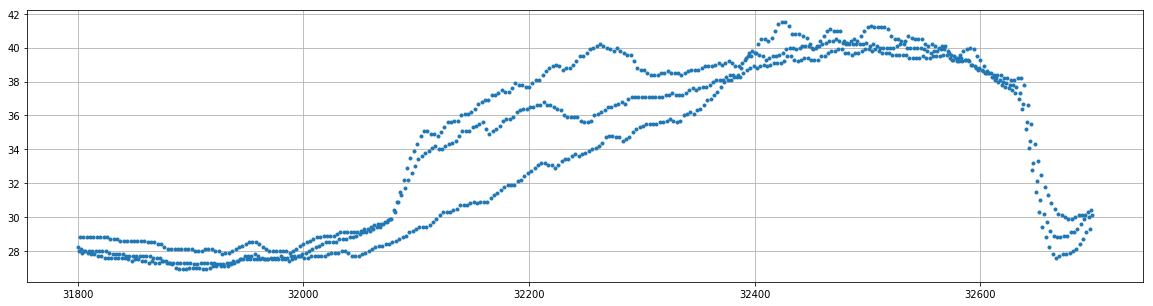

In [9]:
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(111)
ax.plot(tmp['TEMP'][31800:32700],'.')
plt.grid()
plt.show()

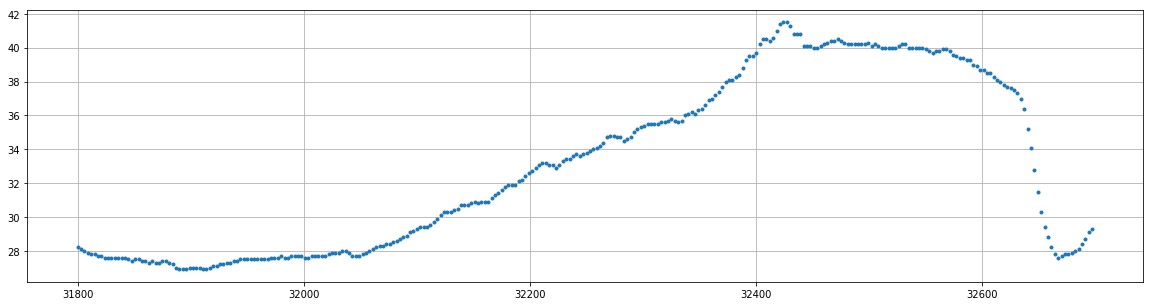

In [8]:
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(111)
#ax.plot(tmp['TEMP'][1000:1500],'.')
plt.grid()
tmp2 = tmp[(tmp.iloc[:,0] % 3 == 0)]
ax.plot(tmp2['TEMP'][10600:10900],'.')
plt.show()

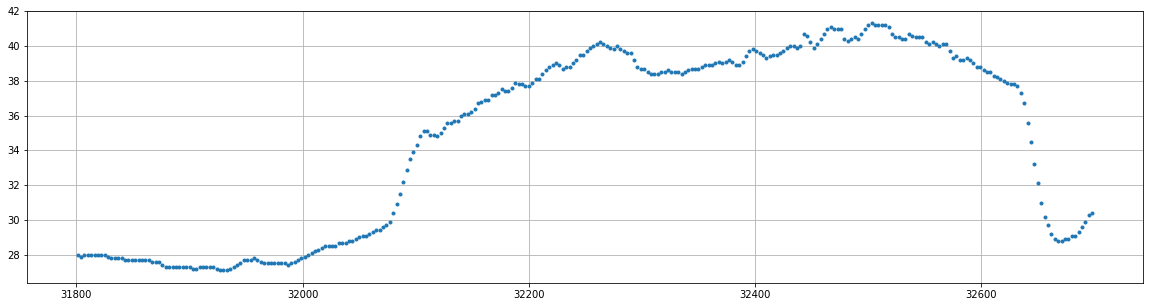

In [7]:
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(111)
#ax.plot(tmp['TEMP'][1000:1500],'.')
plt.grid()
tmp3 = tmp[(tmp.iloc[:,0] % 3 == 1)]
ax.plot(tmp3['TEMP'][10600:10900],'.')
plt.show()

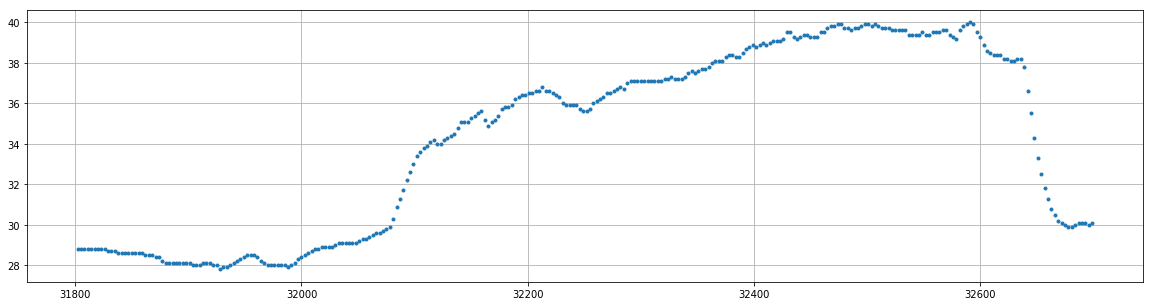

In [6]:
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(111)
#ax.plot(tmp['TEMP'][1000:1500],'.')
plt.grid()
tmp4 = tmp[(tmp.iloc[:,0] % 3 == 2)]
ax.plot(tmp4['TEMP'][10600:10900],'.')
plt.show()

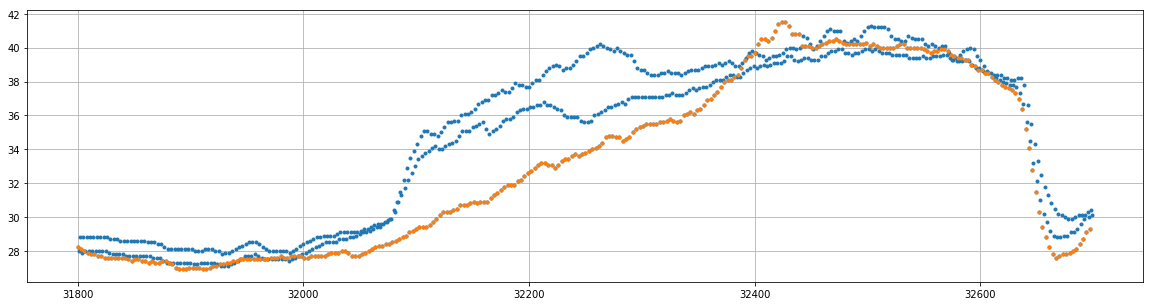

In [10]:
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(111)
ax.plot(tmp['TEMP'][31800:32700],'.')
tmp2 = tmp[(tmp.iloc[:,0] % 3 == 0)]
ax.plot(tmp2['TEMP'][10600:10900],'.')
plt.grid()
plt.show()